In [30]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Load the Datasets
df = pd.read_csv('hair_fall.csv')
df1 = pd.read_csv('hairfall2.csv')
df2 = pd.read_csv('hairfall3.csv')


from sklearn.preprocessing import LabelEncoder

# Rename the column
df2.rename(columns={'Do you have hair fall problem ?': 'Hair Loss'}, inplace=True)

# List of columns to label encode
columns_to_encode = [
    'What is your name ?', 'What is your gender ?', 'Hair Loss',
    'Is there anyone in your family having a hair fall problem or a baldness issue?',
    'Did you face any type of chronic illness in the past?', 'Do you stay up late at night?',
    'Do you have any type of sleep disturbance?', 'Do you think that in your area water is a reason behind hair fall problems?',
    'Do you use chemicals, hair gel, or color in your hair?', 'Do you have anemia?',
    'Do you have too much stress', 'What is your food habit'
]

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df2[column] = le.fit_transform(df2[column])

df2.head()

df2.drop(columns=['Timestamp', 'What is your name ?'], inplace=True)

df['Label'] = df['Hair Loss']
df1['Label'] = df1['Label']  # Already named correctly in df1


df1.rename(columns={'Age(Yrs.)': 'Age'}, inplace=True)  # Align target column name
df2.rename(columns={'What is your age ?': 'Age', 'What is your gender ?': 'Gender', 'Hair Loss': 'Label'}, inplace=True) 

In [31]:
df1['Enviromental_factor'] = df1['Radiation']

In [32]:
df1.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Radiation', 'Hairline_Pattern',
       'Hairstyle', 'Density', 'Hair_Fall_Rate', 'Scalp_Infection',
       'Pain_Itch', 'Nutrition', 'Weight_Loss', 'Sleeping_Pattern',
       'Chemical_Products', 'Medication', 'Region', 'Label',
       'Enviromental_factor'],
      dtype='object')

In [33]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Age',
       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',
       'Weight Loss', 'Hair Loss', 'Label'],
      dtype='object')

In [34]:
import pandas as pd


# Renaming columns in df1
df.rename(columns={
    'Medications & Treatments': 'Medication',
    'Nutritional Deficiencies': 'Nutrition',
    'Environmental Factors': 'Enviromental_factor'
}, inplace=True)

# Renaming columns in df2
df2.rename(columns={
    'Do you have too much stress': 'Stress',
    'What is your food habit': 'Food_Habit',
    'Is there anyone in your family having a hair fall problem or a baldness issue?': 'Genetics',
    'Do you stay up late at night?': 'Sleeping_Pattern',
    'Do you use chemicals, hair gel, or color in your hair?':  'Chemical_Products'

}, inplace=True)



df.drop(columns=['Hair Loss','Id'], inplace=True)

df1.drop(columns=['Region','Radiation'], inplace=True)



In [35]:
df.columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medication',
       'Nutrition', 'Stress', 'Age', 'Poor Hair Care Habits',
       'Enviromental_factor', 'Smoking', 'Weight Loss', 'Label'],
      dtype='object')

In [36]:
df1.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Hairline_Pattern', 'Hairstyle',
       'Density', 'Hair_Fall_Rate', 'Scalp_Infection', 'Pain_Itch',
       'Nutrition', 'Weight_Loss', 'Sleeping_Pattern', 'Chemical_Products',
       'Medication', 'Label', 'Enviromental_factor'],
      dtype='object')

In [37]:
df2.columns

Index(['Age', 'Gender', 'Label', 'Genetics',
       'Did you face any type of chronic illness in the past?',
       'Sleeping_Pattern', 'Do you have any type of sleep disturbance?',
       'Do you think that in your area water is a reason behind hair fall problems?',
       'Chemical_Products', 'Do you have anemia?', 'Stress', 'Food_Habit'],
      dtype='object')

In [38]:


# Merge df1 and df2 on common columns (Age, Gender, Label, Sleeping_Pattern, Chemical_Products)
merged_df1 = pd.merge(df1, df2, on=['Age', 'Gender', 'Label', 'Sleeping_Pattern', 'Chemical_Products'], how='outer')

# Now merge the above result with df on common columns (Age, Label, Genetics, Stress)
main_data = pd.merge(merged_df1, df, on=['Age', 'Label', 'Genetics', 'Stress','Enviromental_factor','Medication','Nutrition'], how='outer')

In [39]:
main_data.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Hairline_Pattern', 'Hairstyle',
       'Density', 'Hair_Fall_Rate', 'Scalp_Infection', 'Pain_Itch',
       'Nutrition', 'Weight_Loss', 'Sleeping_Pattern', 'Chemical_Products',
       'Medication', 'Label', 'Enviromental_factor', 'Genetics',
       'Did you face any type of chronic illness in the past?',
       'Do you have any type of sleep disturbance?',
       'Do you think that in your area water is a reason behind hair fall problems?',
       'Do you have anemia?', 'Stress', 'Food_Habit', 'Hormonal Changes',
       'Medical Conditions', 'Poor Hair Care Habits', 'Smoking',
       'Weight Loss'],
      dtype='object')

In [40]:
from sklearn.utils import resample

# Assuming main_data is your merged dataset with 554 rows and 37 columns

# 1. Randomly resample (with replacement) to increase the number of rows
# Upsample to 30,000 rows using resampling

# Create a dataframe with 30000 rows by resampling with replacement
main_data = resample(main_data, 
                          replace=True,       # Sample with replacement
                          n_samples=20000,    # Increase number of rows to 30,000
                          random_state=42)    # For reproducibility

# 2. Noise Injection on Numerical Columns (e.g., Age, Genetics, Medication)
# Let's add random noise to numerical columns

numerical_columns = ['Age', 'Genetics', 'Medication', 'Enviromental_factor', 'Nutrition']  # Example numerical columns

for col in numerical_columns:
    noise = np.random.normal(0, 0.05, size=main_data[col].shape)  # Adding random noise with small standard deviation
    main_data[col] += noise  # Add the noise

# 3. For Categorical Data (Optional): Slightly modify categorical values to add variations
categorical_columns = ['Gender', 'Label', 'Sleeping_Pattern', 'Chemical_Products', 'Stress']  # Example categorical columns

for col in categorical_columns:
    main_data[col] = main_data[col].apply(lambda x: x if np.random.rand() > 0.05 else np.random.choice(main_data[col].unique()))

# Display the augmented dataset shape and a sample
print(main_data.shape)  # Should print (30000, 37)
print(main_data.head())  # Show first few rows of the augmented data


(20000, 34)
      Gender        Age  Marital_Status  Father  Mother  Grand_Father  \
860      1.0  30.084109             NaN     NaN     NaN           NaN   
1294     0.0  22.944936             NaN     NaN     NaN           NaN   
1130     0.0  27.998229             NaN     NaN     NaN           NaN   
1095     1.0  31.989835             NaN     NaN     NaN           NaN   
1638     NaN  37.027337             NaN     NaN     NaN           NaN   

      Grand_Mother  Siblings  Pregnant  Hairline_Pattern  ...  \
860            NaN       NaN       NaN               NaN  ...   
1294           NaN       NaN       NaN               NaN  ...   
1130           NaN       NaN       NaN               NaN  ...   
1095           NaN       NaN       NaN               NaN  ...   
1638           NaN       NaN       NaN               NaN  ...   

      Do you have any type of sleep disturbance?  \
860                                          1.0   
1294                                         1.0   
11

In [41]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
860,1.0,30.084109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1294,0.0,22.944936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1130,0.0,27.998229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1095,1.0,31.989835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1638,NaN,37.027337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,1.0,8.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,NaN,17.917893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,5.0,0.0,1.0,1.0
132,0.0,54.002496,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,1.0,55.956614,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2311,NaN,34.931542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,0.0,4.0,0.0,0.0,1.0


In [42]:
numerical_columns = ['Age', 'Hair_Fall_Rate']

# Fill numerical columns with median
main_data[numerical_columns] = main_data[numerical_columns].apply(lambda x: x.fillna(x.median()) if x.dtype != 'object' else x)

# Columns to treat as categorical (binary)
categorical_columns = ['Gender', 'Marital_Status', 'Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings', 
                       'Pregnant', 'Nutrition','Hairline_Pattern', 'Hairstyle', 'Density', 'Scalp_Infection', 'Pain_Itch', 'Weight_Loss', 
                       'Sleeping_Pattern', 'Chemical_Products', 'Medication', 'Enviromental_factor', 'Genetics', 
                       'Did you face any type of chronic illness in the past?', 'Do you have any type of sleep disturbance?', 
                       'Do you think that in your area water is a reason behind hair fall problems?', 'Do you have anemia?', 
                       'Stress', 'Food_Habit', 'Hormonal Changes', 'Medical Conditions', 'Poor Hair Care Habits', 'Smoking', 'Weight Loss']

# Fill categorical columns (binary values) with mode
main_data[categorical_columns] = main_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check if there are still any missing values
print(main_data.isnull().sum())  

Gender                                                                         0
Age                                                                            0
Marital_Status                                                                 0
Father                                                                         0
Mother                                                                         0
Grand_Father                                                                   0
Grand_Mother                                                                   0
Siblings                                                                       0
Pregnant                                                                       0
Hairline_Pattern                                                               0
Hairstyle                                                                      0
Density                                                                        0
Hair_Fall_Rate              

In [43]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
860,1.0,30.084109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1294,0.0,22.944936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1130,0.0,27.998229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1095,1.0,31.989835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1638,0.0,37.027337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,0.0,17.917893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,1.0,1.0
132,0.0,54.002496,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
448,1.0,55.956614,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2311,0.0,34.931542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0


In [44]:
main_data.drop(columns=['Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings'], inplace=True)

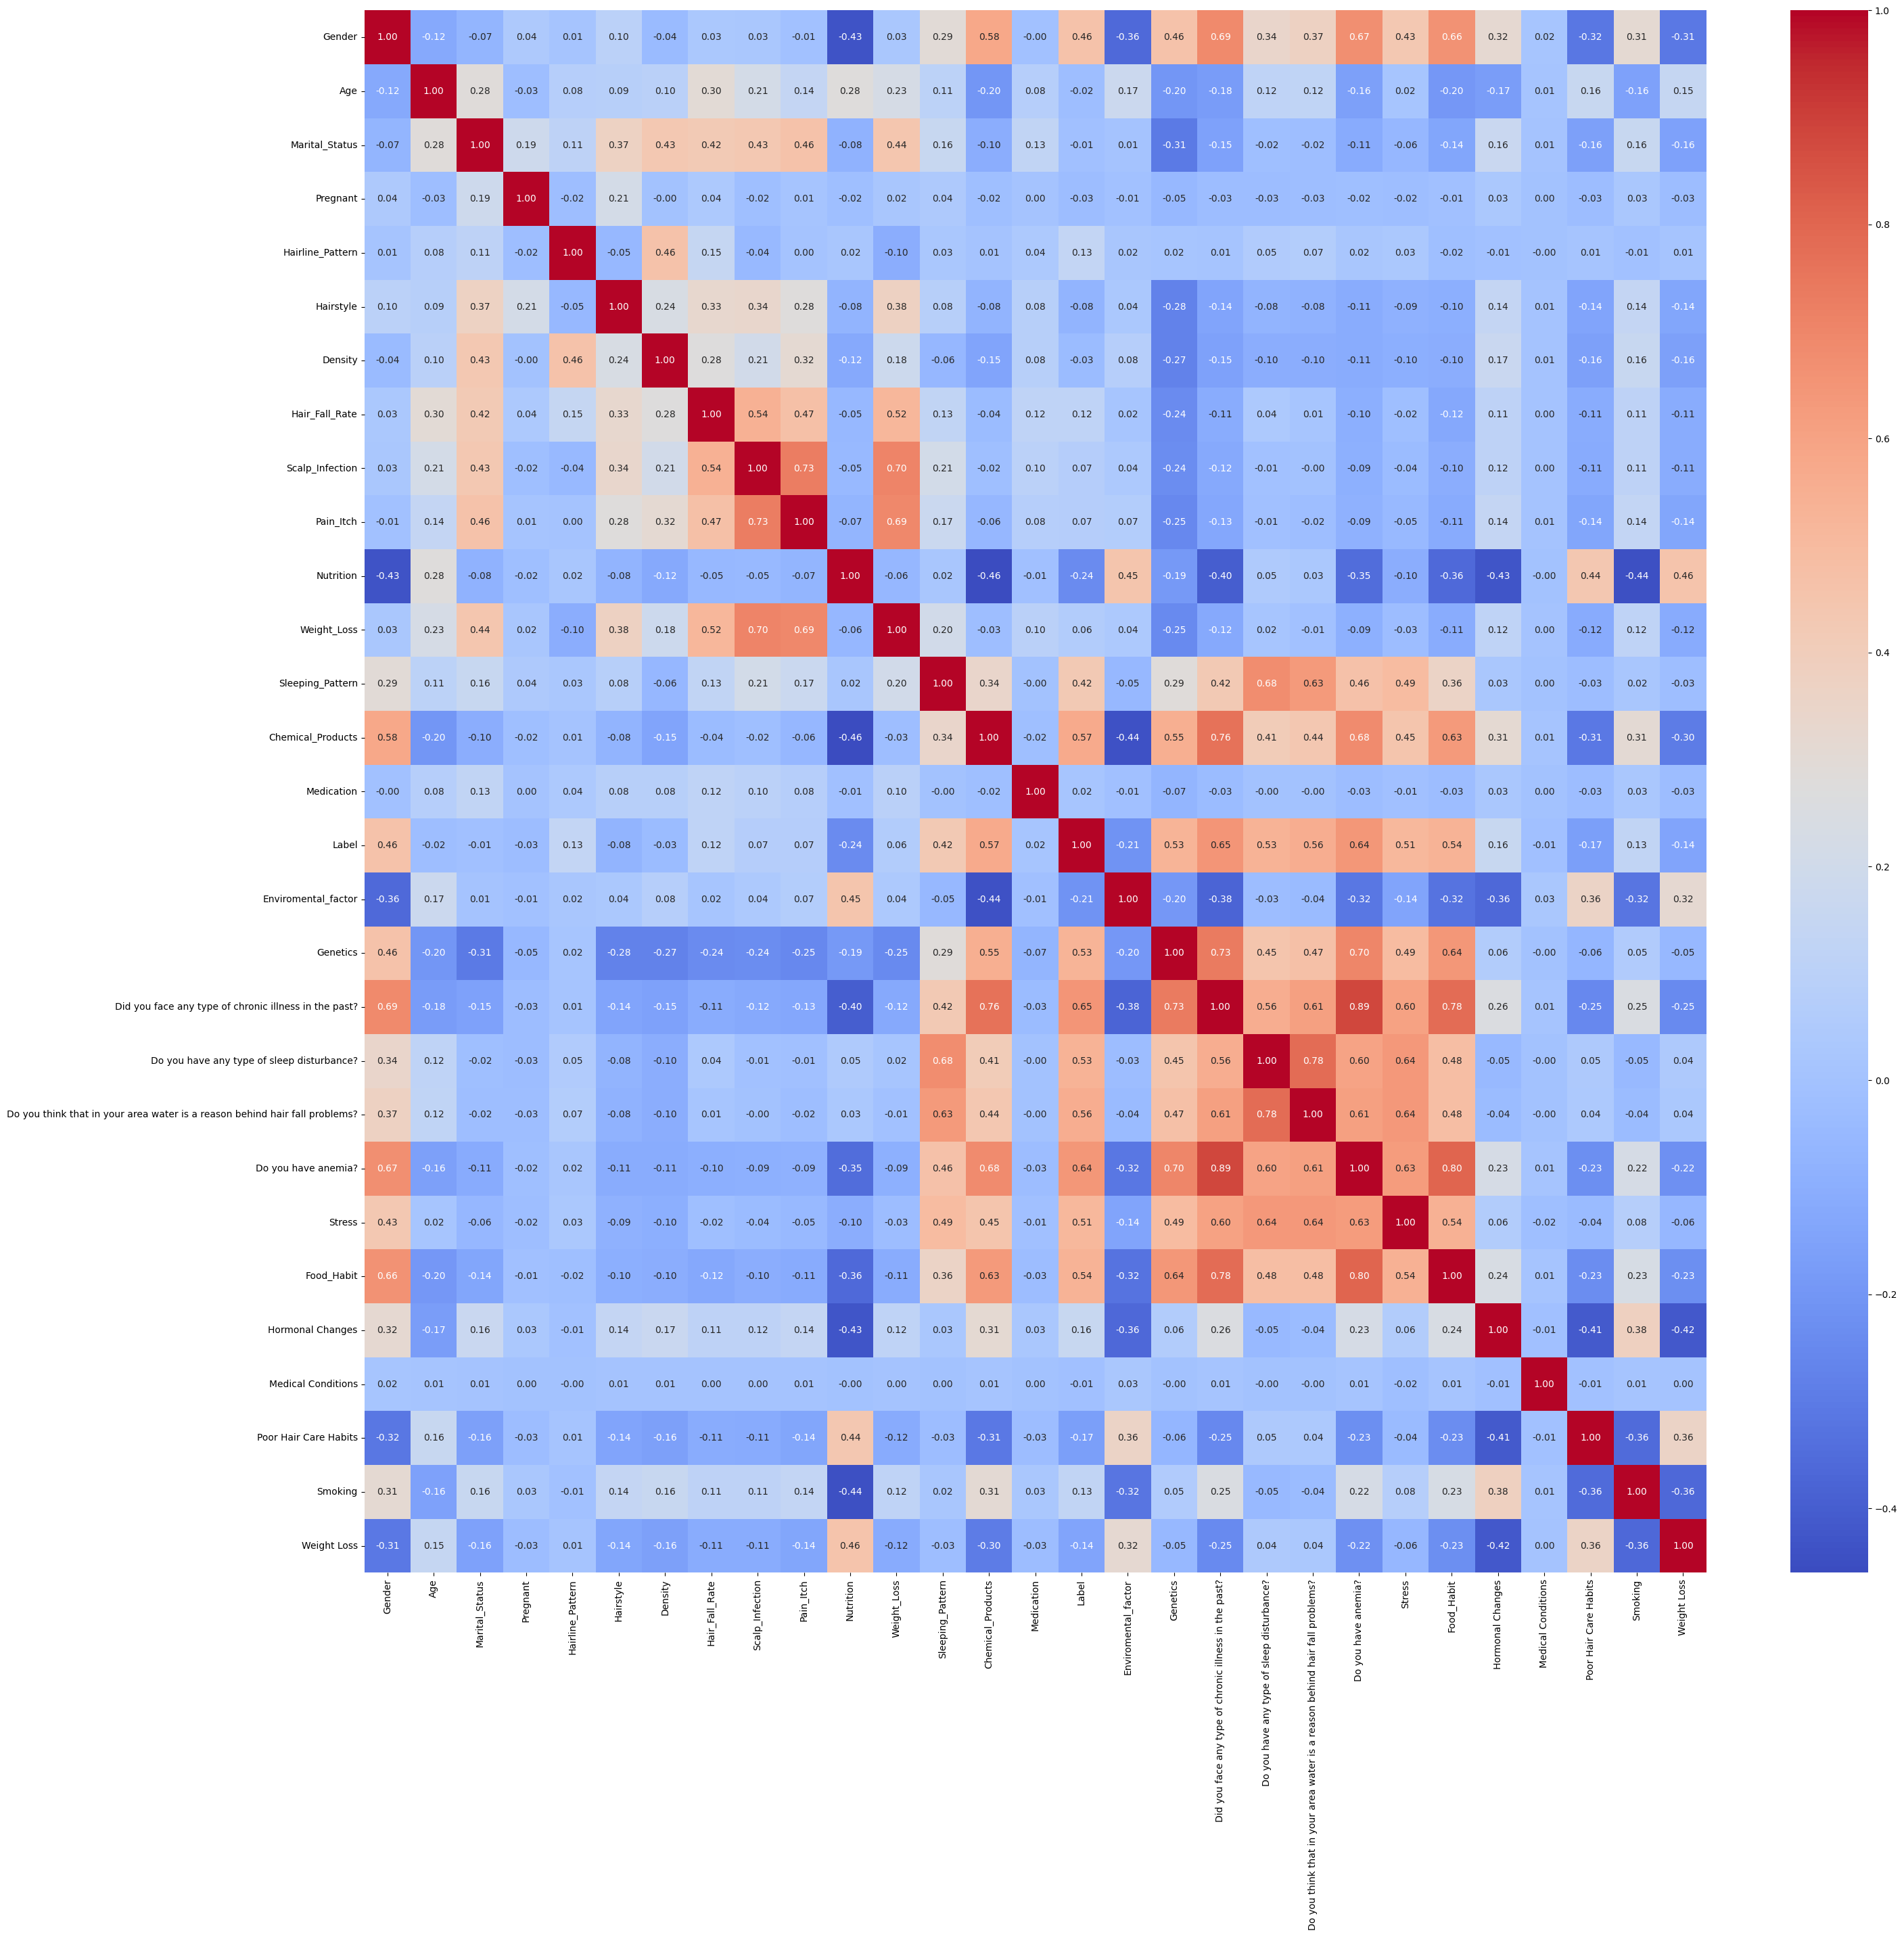

In [45]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = main_data.corr()

# Set the figure size
plt.figure(figsize=(32, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [46]:
main_data

,Gender,Age,Marital_Status,Pregnant,Hairline_Pattern,Hairstyle,Density,Hair_Fall_Rate,Scalp_Infection,Pain_Itch,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
860,1.0,30.084109,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1294,0.0,22.944936,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1130,0.0,27.998229,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1095,1.0,31.989835,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,1.0,5.0,0.0,1.0,0.0
1638,0.0,37.027337,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,0.0,17.917893,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,1.0,1.0
132,0.0,54.002496,0.0,0.0,2.0,0.0,1.0,233.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
448,1.0,55.956614,1.0,0.0,0.0,0.0,0.0,230.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2311,0.0,34.931542,0.0,0.0,1.0,0.0,0.0,52.0,0.0,0.0,...,1.0,1.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0


In [47]:
main_data['Label'].value_counts()

1    9738
0    7851
2    2411
Name: Label, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE

# Assuming 'Label' is your target variable
X = main_data.drop('Label', axis=1)  # Features
y = main_data['Label']  # Target variable

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create the new DataFrame with resampled data
main_data = pd.DataFrame(X_resampled, columns=X.columns)
main_data['Label'] = y_resampled

# Display the value counts of the resampled data
print(main_data['Label'].value_counts())

# Optionally, display the head of the resampled data
print(main_data.head())


1    9738
0    9738
2    9738
Name: Label, dtype: int64
   Gender        Age  Marital_Status  Pregnant  Hairline_Pattern  Hairstyle  \
0     1.0  30.084109             0.0       0.0               1.0        0.0   
1     0.0  22.944936             0.0       0.0               1.0        0.0   
2     0.0  27.998229             0.0       0.0               1.0        0.0   
3     1.0  31.989835             0.0       0.0               1.0        0.0   
4     0.0  37.027337             0.0       0.0               1.0        0.0   

   Density  Hair_Fall_Rate  Scalp_Infection  Pain_Itch  ...  \
0      0.0            52.0              0.0        0.0  ...   
1      0.0            52.0              0.0        0.0  ...   
2      0.0            52.0              0.0        0.0  ...   
3      0.0            52.0              0.0        0.0  ...   
4      0.0            52.0              0.0        0.0  ...   

   Do you think that in your area water is a reason behind hair fall problems?  \
0       

In [49]:
main_data.rename(columns={
    'Marital_Status': 'Marital Status',
    'Hairline_Pattern': 'Hairline Pattern',
    'Hair_Fall_Rate': 'Hair Fall Rate',
    'Scalp_Infection': 'Scalp Infection',
    'Pain_Itch': 'Scalp Pain/Itch',
    'Sleeping_Pattern': 'Sleeping Pattern',
    'Chemical_Products': 'Chemical Product Usage',
    'Enviromental_factor': 'Environmental Factor',
    'Did you face any type of chronic illness in the past?': 'Past Chronic Illness',
    'Do you have any type of sleep disturbance?': 'Sleep Disturbance',
    'Do you think that in your area water is a reason behind hair fall problems?': 'Water Quality Issue',
    'Do you have anemia?': 'Anemia',
    'Food_Habit': 'Food Habit',
    'Poor Hair Care Habits': 'Hair Care Habits'
}, inplace=True)

In [50]:
# Calculate the correlation of each column with the label
correlation_with_label = main_data.corr()['Label'].sort_values(ascending=False)

# Display the correlation
print(correlation_with_label)

Label                     1.000000
Past Chronic Illness      0.788028
Anemia                    0.786327
Food Habit                0.729871
Chemical Product Usage    0.723154
Water Quality Issue       0.723077
Sleep Disturbance         0.709046
Genetics                  0.708218
Stress                    0.692016
Gender                    0.664091
Sleeping Pattern          0.606706
Hormonal Changes          0.247499
Smoking                   0.228500
Hairline Pattern          0.115126
Hair Fall Rate            0.030831
Medical Conditions       -0.002767
Medication               -0.006504
Scalp Infection          -0.007334
Weight_Loss              -0.022426
Scalp Pain/Itch          -0.026751
Pregnant                 -0.042337
Age                      -0.091015
Marital Status           -0.103228
Density                  -0.121618
Hairstyle                -0.143397
Weight Loss              -0.241161
Hair Care Habits         -0.257940
Environmental Factor     -0.355539
Nutrition           

In [51]:
# Dropping unnecessary columns
columns_to_drop = ['Marital Status', 'Environmental Factor', 'Sleeping Pattern', 
                   'Scalp Pain/Itch', 'Anemia', 'Medical Conditions', 'Medication','Weight_Loss','Hairstyle','Pregnant']

# Ensure only one "Weight Loss" column is removed (if duplicate exists)
if 'Weight Loss' in main_data.columns:
    columns_to_drop.append('Weight Loss')  # Add only if it exists

# Drop the columns safely
main_data.drop(columns=columns_to_drop, inplace=True)


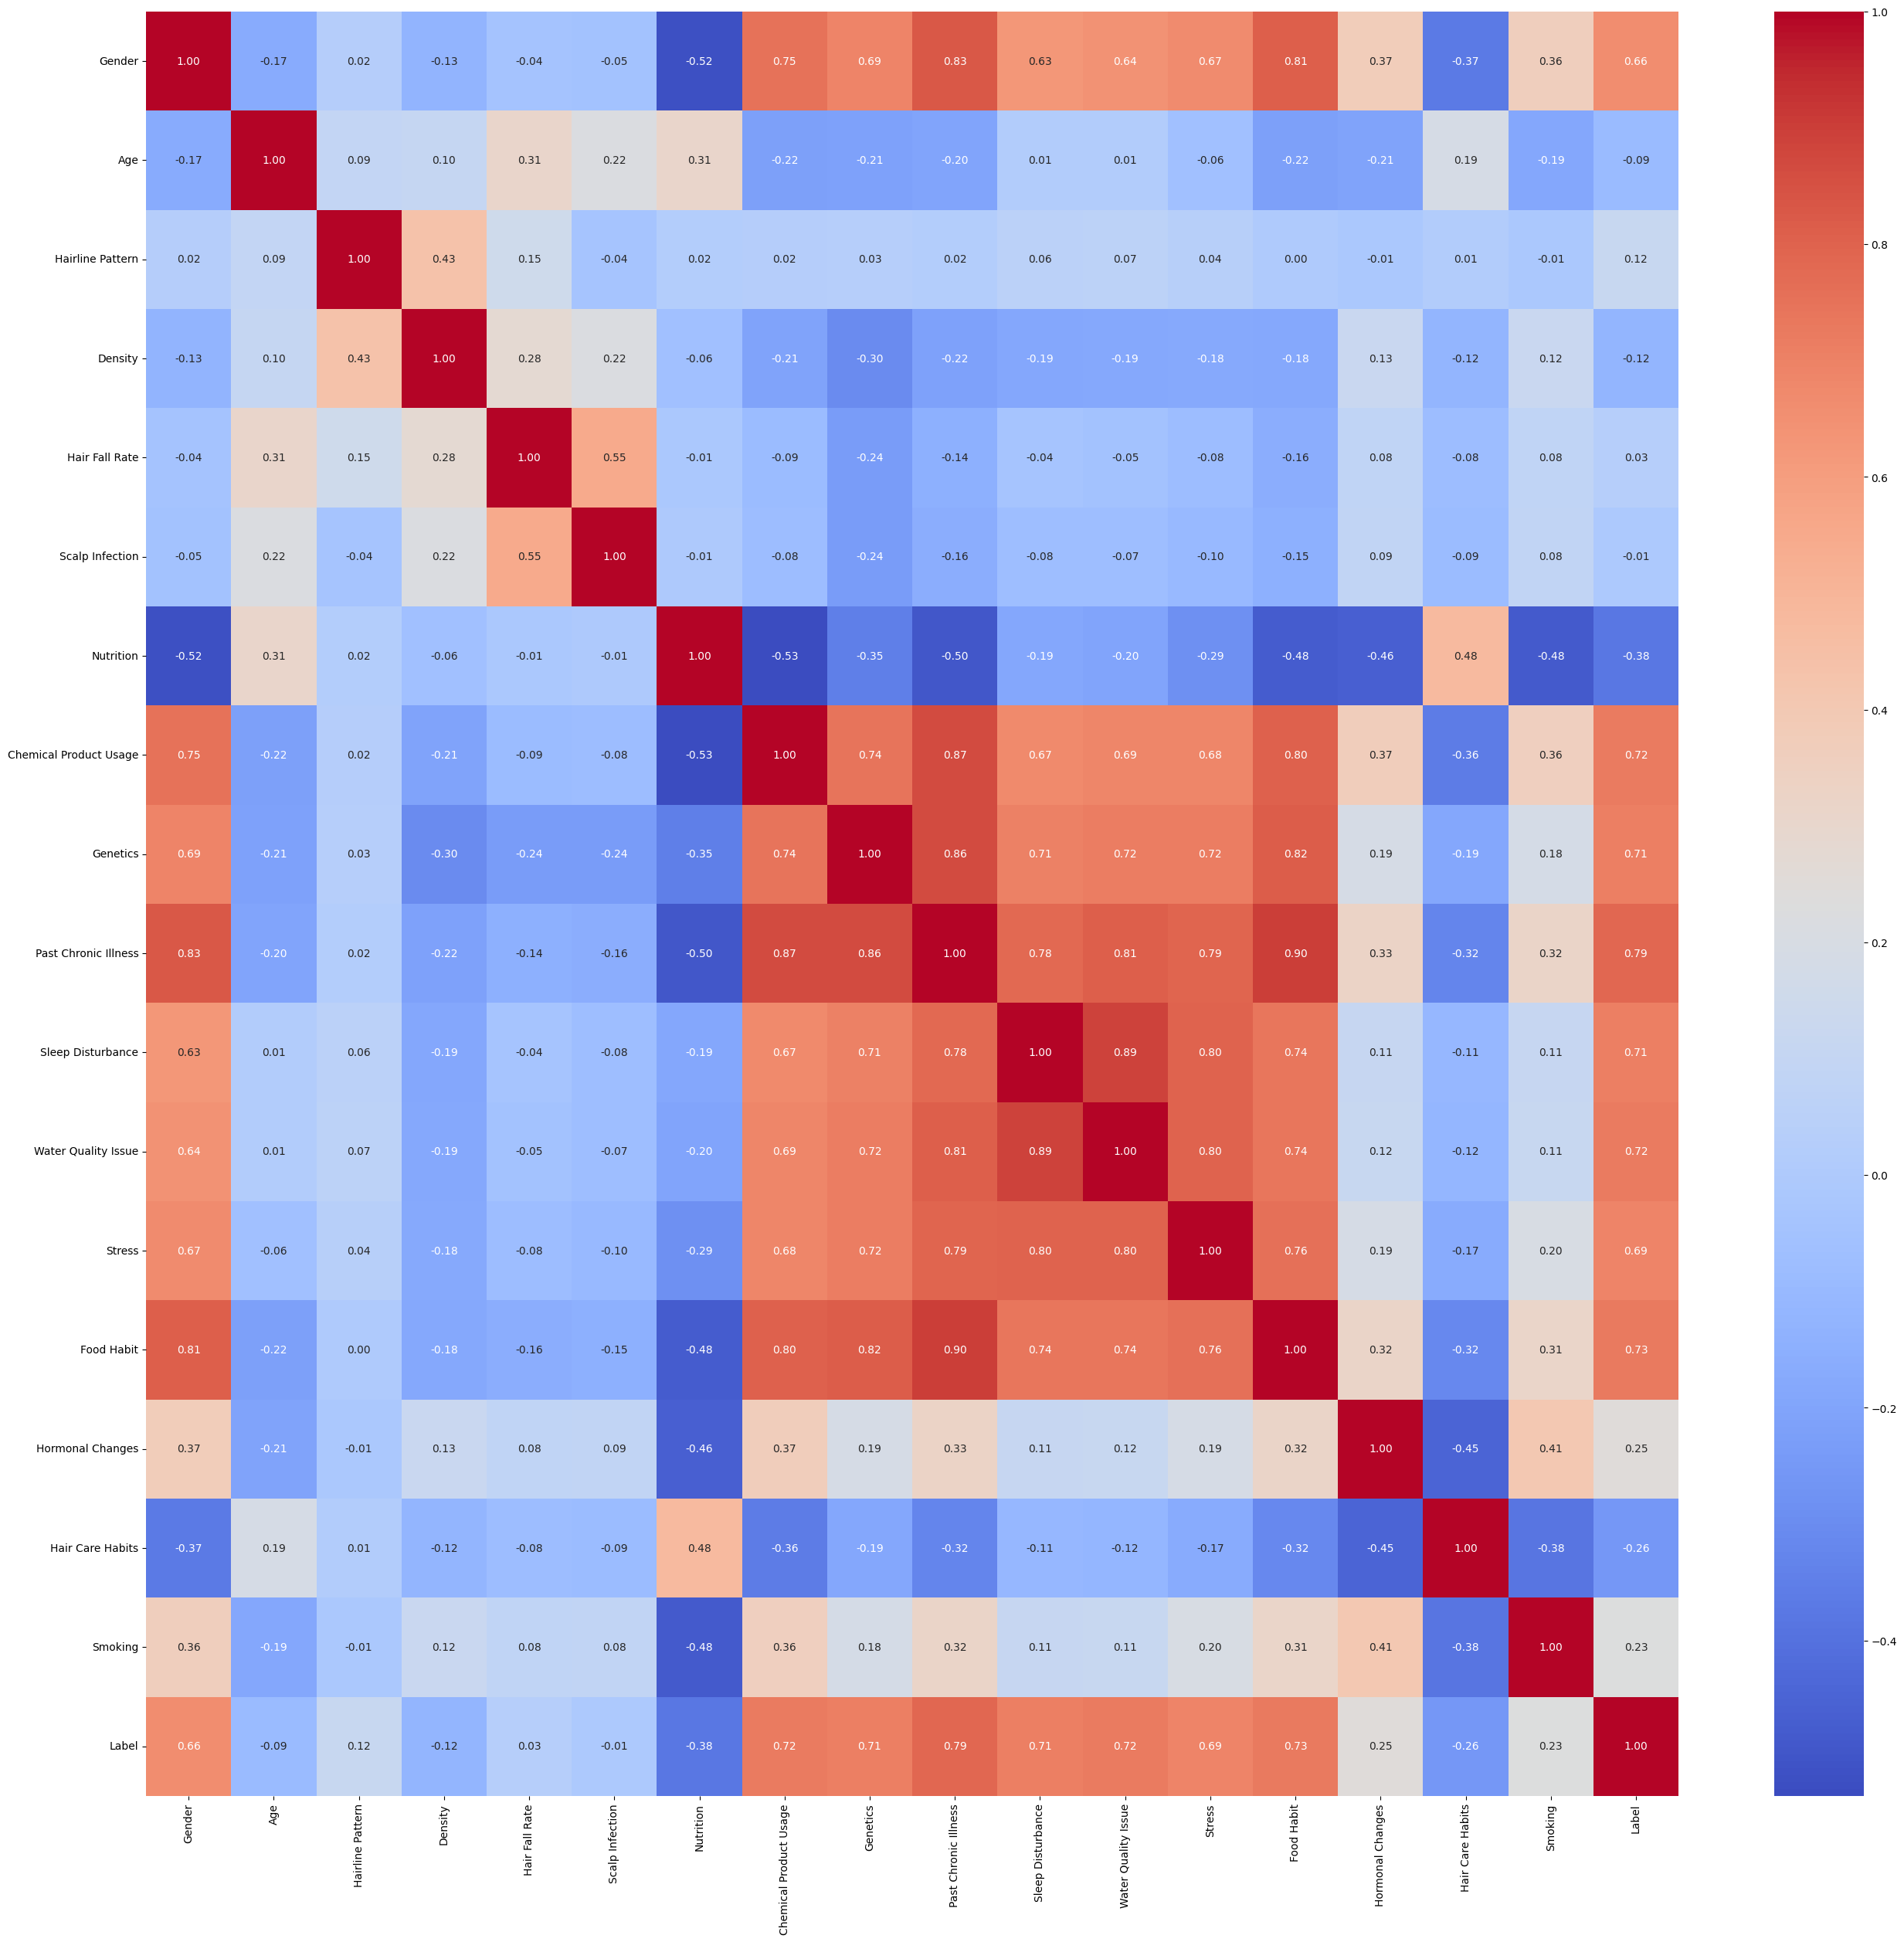

In [52]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = main_data.corr()

# Set the figure size
plt.figure(figsize=(32, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [53]:
main_data = main_data.astype(int)
main_data.dtypes

Gender                    int32
Age                       int32
Hairline Pattern          int32
Density                   int32
Hair Fall Rate            int32
Scalp Infection           int32
Nutrition                 int32
Chemical Product Usage    int32
Genetics                  int32
Past Chronic Illness      int32
Sleep Disturbance         int32
Water Quality Issue       int32
Stress                    int32
Food Habit                int32
Hormonal Changes          int32
Hair Care Habits          int32
Smoking                   int32
Label                     int32
dtype: object

In [54]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Density', 'Hair Fall Rate',
       'Scalp Infection', 'Nutrition', 'Chemical Product Usage', 'Genetics',
       'Past Chronic Illness', 'Sleep Disturbance', 'Water Quality Issue',
       'Stress', 'Food Habit', 'Hormonal Changes', 'Hair Care Habits',
       'Smoking', 'Label'],
      dtype='object')

In [59]:
main_data['Hair Fall Rate'].value_counts()

52     22933
40      1144
252      514
50       399
10       328
       ...  
113        1
286        1
243        1
44         1
281        1
Name: Hair Fall Rate, Length: 204, dtype: int64

In [56]:
main_data['Label'].value_counts()

1    9738
0    9738
2    9738
Name: Label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)


Accuracy: 0.8898
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1899
           1       0.86      0.87      0.87      1962
           2       0.96      0.91      0.94      1982

    accuracy                           0.89      5843
   macro avg       0.89      0.89      0.89      5843
weighted avg       0.89      0.89      0.89      5843



In [58]:
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Display top important features
print(feature_importance)

                   Feature  Importance
1                      Age    0.193312
9     Past Chronic Illness    0.116032
13              Food Habit    0.104932
11     Water Quality Issue    0.103103
12                  Stress    0.097168
10       Sleep Disturbance    0.072828
4           Hair Fall Rate    0.069361
6                Nutrition    0.068567
7   Chemical Product Usage    0.055471
0                   Gender    0.030321
8                 Genetics    0.022389
2         Hairline Pattern    0.018061
15        Hair Care Habits    0.011010
14        Hormonal Changes    0.010760
3                  Density    0.009090
16                 Smoking    0.008809
5          Scalp Infection    0.008784
